# Dense Neural Network Regressor

In [1]:
import feather
import pandas as pd
import category_encoders as ce
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

pd.options.display.max_columns = None
path_train = './input/train_final.feather'
path_test = './input/test_final.feather'

# Import des dataframes

In [2]:
df_train = feather.read_dataframe(path_train)
df_test = feather.read_dataframe(path_test)

# Split des dataframes

In [3]:
y_train = df_train.pop('Rating')

In [4]:
X_train = df_train

In [5]:
y_test = df_test.pop('Rating')

In [6]:
X_test = df_test

# Encoding

Il est nécessaire de retravailler les différentes features afin d'alimenter le réseau

In [7]:
def divide_features_by_type(X_train):
    cat_cols = list(X_train.select_dtypes(include=['object']).columns)
    num_cols = list(X_train.select_dtypes(include=['int64', 'float64']).columns)
    return cat_cols, num_cols

In [8]:
cat_cols, num_cols = divide_features_by_type(X_train)

## Normalisation des variables numériques

Pour faciliter l'entraînement du réseau, nous normalisons les données numériques par centrage et réduction.

In [9]:
def normalize(df, num_cols):
    for col in num_cols:
         df[col] = normalize_column(df[col].values)
    return df

In [10]:
def normalize_column(col):
    return (col - np.mean(col)) / np.std(col)

In [11]:
X_train = normalize(X_train,num_cols)

In [12]:
X_test = normalize(X_test,num_cols)

## Encoding des variables catégorielles

Nous encodons nos variables catégorielles avec un binaryEncoder 

In [13]:
def encode_with_catboost(X_train, y_train, X_test, cat_cols):
    encoder = ce.BinaryEncoder(verbose = 3, cols = cat_cols, return_df=True)
    encoder.fit(X_train, y_train)
    X_train_cat = encoder.transform(X_train)
    X_test_cat = encoder.transform(X_test)
    return X_train_cat, X_test_cat
    

In [14]:
X_train, X_test = encode_with_catboost(X_train, y_train, X_test, cat_cols)

In [15]:
X_train.head(10)

,Artist,Track,User,Time,GENDER_0,GENDER_1,GENDER_2,AGE,WORKING_0,WORKING_1,WORKING_2,WORKING_3,WORKING_4,REGION_0,REGION_1,REGION_2,REGION_3,MUSIC_0,MUSIC_1,MUSIC_2,MUSIC_3,LIST_OWN,LIST_BACK,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,HEARD_OF_0,HEARD_OF_1,HEARD_OF_2,HEARD_OF_3,OWN_ARTIST_MUSIC_0,OWN_ARTIST_MUSIC_1,OWN_ARTIST_MUSIC_2,OWN_ARTIST_MUSIC_3,LIKE_ARTIST,Uninspired,Sophisticated,Aggressive,Edgy,Sociable,Laid back,Wholesome,Uplifting,Intriguing,Legendary,Free,Thoughtful,Outspoken,Serious,Good lyrics,Unattractive,Confident,Old,Youthful,Boring,Current,Colourful,Stylish,Cheap,Irrelevant,Heartfelt,Calm,Pioneer,Outgoing,Inspiring,Beautiful,Fun,Authentic,Credible,Way out,Cool,Catchy,Sensitive,Mainstream,Superficial,Annoying,Dark,Passionate,Not authentic,Good Lyrics,Background,Timeless,Depressing,Original,Talented,Worldly,Distinctive,Approachable,Genius,Trendsetter,Noisy,Upbeat,Relatable,Energetic,Exciting,Emotional,Nostalgic,None of these,Progressive,Sexy,Over,Rebellious,Fake,Cheesy,Popular,Superstar,Relaxed,Intrusive,Unoriginal,Dated,Iconic,Unapproachable,Classic,Playful,Arrogant,Warm,Soulful
0,0.744235,-0.027294,0.580675,-0.569523,0,0,1,1.215396,0,0,0,0,1,0,0,0,1,0,0,0,1,-0.768520,-0.573996,0.105928,0.544015,0.650999,-1.139344,0.736234,-1.201285,0.730820,0.856592,-0.638230,0.740766,1.601930,0.752056,0.993550,1.700869,1.810621,1.712510,1.078109,0.339381,1.222522,0,0,0,1,0,0,0,1,0.024373,-0.147401,-0.112964,-0.193592,-0.324189,-0.113803,-0.173009,-0.042252,-0.133495,-0.1371,-0.126675,-0.220219,-0.333993,-0.101856,-0.213114,2.565783,-0.236033,-0.377037,-0.083573,-0.331500,-0.384802,2.408371,-0.150767,3.109581,-0.174123,-0.107578,-0.153525,-0.388289,-0.076401,-0.203241,-0.244501,-0.353916,-0.333171,2.561264,-0.338837,-0.095243,2.424141,2.040484,-0.26424,-0.162682,-0.197246,-0.206802,-0.100149,-0.308024,-0.090526,-0.205247,-0.123948,-0.338739,-0.279225,-0.431863,-0.446225,-0.064841,1.976354,-0.318694,-0.120769,-0.203064,-0.239331,3.052190,-0.108832,-0.378662,-0.139587,-0.183956,-0.103274,-0.297383,-0.091193,-0.185204,-0.138274,-0.131136,-0.160806,-0.228332,-0.15141,-0.083733,-0.146955,-0.076049,-0.277124,-0.276722,-0.113024,-0.123008,-0.337547,-0.222294,-0.169236,-0.323227,-0.111145
1,-1.395643,1.561407,1.527475,0.206835,0,1,0,2.640105,0,0,0,1,0,0,0,1,0,0,0,1,0,-0.383700,-0.248388,0.143301,-1.145132,-1.025354,0.473727,1.534705,0.441191,-0.029580,0.220214,-0.487249,0.131952,-1.079931,-0.754317,0.029616,-0.174139,-1.242820,-0.311837,-0.991475,0.294540,-0.436011,0,0,1,0,0,0,0,1,0.024373,-0.147401,-0.112964,-0.193592,-0.324189,-0.113803,-0.173009,-0.042252,-0.133495,-0.1371,-0.126675,-0.220219,-0.333993,-0.101856,-0.213114,-0.389745,-0.236033,-0.377037,-0.083573,-0.331500,-0.384802,-0.415218,-0.150767,-0.321587,-0.174123,-0.107578,-0.153525,-0.388289,-0.076401,4.920273,-0.244501,-0.353916,-0.333171,-0.390432,-0.338837,-0.095243,-0.412517,-0.490080,-0.26424,-0.162682,-0.197246,-0.206802,-0.100149,-0.308024,-0.090526,-0.205247,-0.123948,-0.338739,-0.279225,-0.431863,-0.446225,-0.064841,-0.505982,-0.318694,-0.120769,-0.203064,-0.239331,-0.327634,-0.108832,-0.378662,-0.139587,-0.183956,-0.103274,-0.297383,-0.091193,-0.185204,-0.138274,-0.131136,-0.160806,-0.228332,-0.15141,-0.083733,-0.146955,-0.076049,-0.277124,-0.276722,-0.113024,-0.123008,-0.337547,-0.222294,-0.169236,-0.323227,-0.111145
2,1.227433,1.614959,1.756767,0.206835,0,1,0,-1.374983,0,0,0,1,1,0,0,1,0,0,0,1,1,5.388591,-0.899605,-0.118310,0.240835,1.313743,0.996885,1.978300,0.881855,0.450672,1.832371,0.909322,0.091364,0.563790,-0.306477,0.492304,0.464162,0.502003,1.622539,0.958710,0.339381,1.135231,0,0,0,1,0,0,0,1,0.024373,-0.147401,-0.112964,-0.193592,-0.324189,-0.113803,-0.173009,-0.042252,-0.133495,-0.1371,-0.126675,-0.220219,-0.333993,-0.101856,-0.213114,-0.389745,4.236689,-0.377037,-0.083573,-0.331500,-0.384802,-0.415218,-0.150767,-0.321587,5.743073,-0.107578,-0.153525,-0.388289,-0.076401,-0.203241,-0.244501,-0.353916,-0.333171,-0.390432,-0.338837

In [16]:
X_test.head(10)

,Artist,Track,User,Time,GENDER_0,GENDER_1,GENDER_2,AGE,WORKING_0,WORKING_1,WORKING_2,WORKING_3,WORKING_4,REGION_0,REGION_1,REGION_2,REGION_3,MUSIC_0,MUSIC_1,MUSIC_2,MUSIC_3,LIST_OWN,LIST_BACK,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,HEARD_OF_0,HEARD_OF_1,HEARD_OF_2,HEARD_OF_3,OWN_ARTIST_MUSIC_0,OWN_ARTIST_MUSIC_1,OWN_ARTIST_MUSIC_2,OWN_ARTIST_MUSIC_3,LIKE_ARTIST,Uninspired,Sophisticated,Aggressive,Edgy,Sociable,Laid back,Wholesome,Uplifting,Intriguing,Legendary,Free,Thoughtful,Outspoken,Serious,Good lyrics,Unattractive,Confident,Old,Youthful,Boring,Current,Colourful,Stylish,Cheap,Irrelevant,Heartfelt,Calm,Pioneer,Outgoing,Inspiring,Beautiful,Fun,Authentic,Credible,Way out,Cool,Catchy,Sensitive,Mainstream,Superficial,Annoying,Dark,Passionate,Not authentic,Good Lyrics,Background,Timeless,Depressing,Original,Talented,Worldly,Distinctive,Approachable,Genius,Trendsetter,Noisy,Upbeat,Relatable,Energetic,Exciting,Emotional,Nostalgic,None of these,Progressive,Sexy,Over,Rebellious,Fake,Cheesy,Popular,Superstar,Relaxed,Intrusive,Unoriginal,Dated,Iconic,Unapproachable,Classic,Playful,Arrogant,Warm,Soulful
0,0.195787,-0.490426,-0.607228,0.833100,0,1,0,0.309750,0,0,0,1,1,0,0,0,1,0,0,1,0,-0.764728,-0.902770,0.109634,-0.062506,-0.121693,-1.366446,-1.216834,0.354356,0.539110,0.785345,0.035691,-0.237626,-0.386679,0.628002,0.076478,-0.166230,-1.200370,-1.125225,0.684538,0.384735,0.443386,0,0,1,0,0,0,0,1,0.020474,-0.146696,-0.110225,-0.194823,-0.329502,-0.118547,-0.180287,-0.041538,-0.134749,-0.139858,-0.124717,-0.225167,-0.333637,-0.100453,-0.213215,-0.387961,-0.234182,-0.376670,-0.084253,3.007888,-0.385607,2.39636,-0.148942,-0.322839,-0.172215,-0.107736,-0.152618,-0.389948,-0.077792,-0.200611,-0.246941,-0.349981,-0.329799,2.563262,-0.340511,-0.099098,2.416674,2.056464,-0.268859,-0.16251,-0.19759,-0.202816,-0.099913,-0.304855,-0.089517,-0.206331,-0.130508,-0.333245,-0.276875,-0.435744,-0.447057,-0.068451,-0.506757,-0.320331,-0.121276,-0.204017,-0.240597,-0.329700,-0.108987,2.632771,-0.136874,-0.184706,-0.10596,-0.29795,-0.091157,-0.180835,-0.13887,-0.130087,-0.161563,-0.226269,-0.15189,-0.090415,-0.150974,-0.082481,-0.272692,-0.278922,-0.116928,-0.122173,-0.343073,-0.222491,-0.169008,-0.323589,-0.108113
1,0.886419,0.027414,0.170439,1.143478,0,1,0,-0.208260,0,0,0,0,1,0,0,1,0,0,1,0,1,0.009655,-0.902770,0.109634,-0.149289,0.620039,0.650708,-0.016591,0.555075,-0.063694,0.145366,0.186612,0.696880,0.391677,0.587304,0.850679,0.672486,1.228292,-0.131996,0.684538,0.384735,0.224044,0,0,1,0,0,0,0,1,0.020474,-0.146696,-0.110225,-0.194823,-0.329502,-0.118547,-0.180287,-0.041538,-0.134749,-0.139858,-0.124717,-0.225167,-0.333637,-0.100453,-0.213215,-0.387961,-0.234182,-0.376670,-0.084253,3.007888,-0.385607,-0.41730,-0.148942,-0.322839,-0.172215,-0.107736,-0.152618,-0.389948,-0.077792,-0.200611,-0.246941,-0.349981,-0.329799,2.563262,-0.340511,-0.099098,2.416674,-0.486272,-0.268859,-0.16251,-0.19759,-0.202816,-0.099913,-0.304855,-0.089517,-0.206331,-0.130508,-0.333245,-0.276875,2.294927,-0.447057,-0.068451,-0.506757,-0.320331,-0.121276,-0.204017,-0.240597,-0.329700,-0.108987,-0.379828,-0.136874,-0.184706,-0.10596,-0.29795,-0.091157,-0.180835,-0.13887,-0.130087,-0.161563,-0.226269,-0.15189,-0.090415,-0.150974,-0.082481,-0.272692,-0.278922,-0.116928,-0.122173,-0.343073,-0.222491,-0.169008,-0.323589,-0.108113
2,-0.080466,-0.686848,-0.461865,0.833100,0,0,1,1.410521,0,0,0,1,0,0,0,0,1,0,0,1,0,-0.764728,-0.577267,-1.652332,-0.062506,-1.058619,-1.234892,-1.305741,1.839677,-1.229117,-1.049263,0.790297,0.046789,0.867338,-0.104569,-1.665475,-1.963479,-1.399441,-1.305812,-1.869918,-1.821486,-1.574561,0,0,1,0,0,0,0,1,0.020474,-0.146696,-0.110225,-0.194823,-0.329502,-0.118547,-0.180287,-0.041538,-0.134749,-0.139858,-0.124717,-0.225167,-0.333637,-0.100453,-0.213215,-0.387961,-0.234182,2.654844,-0.084253,-0.332459,-0.385607,2.39636,-0.148942,3.097517,-0.172215,-0.107736,-0.152618,-0.389948,-0.077792,-0.200611,-0.246941,-0.349981,-0.329799,-0.390128,-0

# Root Mean Squared Error

In [17]:
def compute_RMSE(y_true, y_pred):
    #la prédiction doit avoir un format entier
    tmp = []
    for el in y_pred:
        tmp.append(round(el))
    RMSE = np.sqrt(np.mean((y_true-tmp)**2))
    print("Root mean squared error: {}".format(RMSE))


In [18]:
from keras import backend
#Nous implémentons la fonction calculant la Root Mean Square Error pour pouvoir lutiliser comme métrique de notre réseau
def rmse(y_true, y_pred):
    return backend.sqrt(backend.mean(backend.square(y_pred-y_true), axis=0))

Using TensorFlow backend.


# Sequential Model - DNN regressor - Keras

Nous allons utiliser un modèle séquentiel, qui permet de construire des réseaux de neurones de type dense, soit un empilement linéaire de couches.

In [19]:
learning_rate = 0.001
epochs = 1000
batch_size = 50
#par defaut
initializer = 'glorot_uniform'

In [20]:
len(X_train.keys())

133

In [33]:
def build_model(X_train, learning_rate, initializer):
    model = keras.Sequential([
        layers.Dense(20, activation=tf.nn.relu, input_shape=[len(X_train.keys())]),
        keras.layers.Dropout(0.2),
        layers.Dense(15, activation=tf.nn.relu),
        keras.layers.Dropout(0.2),
        layers.Dense(1)
    ])
    #L'optimizer permet d'ajuster les poids en fonction du résultat de la loss
    optimizer = tf.keras.optimizers.Adam(lr=learning_rate)

    model.compile(loss='mean_squared_error',
                optimizer=optimizer,
                metrics=['mean_squared_error', rmse])
    return model

In [34]:
model = build_model(X_train, learning_rate, initializer)

ValueError: Could not interpret metric function identifier: 15.679402

In [35]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=15)

In [25]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                4020      
_________________________________________________________________
dropout (Dropout)            (None, 30)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                310       
_________________________________________________________________
dropout_1 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 4,341
Trainable params: 4,341
Non-trainable params: 0
_________________________________________________________________


In [26]:
history = model.fit(X_train, 
                    y_train,
                    batch_size = batch_size,
                    epochs=epochs,
                    validation_split = 0.2,
                    verbose=2,
                    callbacks=[early_stop])

Train on 120761 samples, validate on 30191 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/1000
 - 8s - loss: 560.3243 - mean_squared_error: 560.3246 - rmse: 23.1249 - val_loss: 296.4051 - val_mean_squared_error: 296.4052 - val_rmse: 17.0966
Epoch 2/1000
 - 8s - loss: 436.0011 - mean_squared_error: 436.0013 - rmse: 20.7232 - val_loss: 273.7841 - val_mean_squared_error: 273.7843 - val_rmse: 16.4473
Epoch 3/1000
 - 10s - loss: 402.1636 - mean_squared_error: 402.1637 - rmse: 19.9105 - val_loss: 279.7767 - val_mean_squared_error: 279.7767 - val_rmse: 16.6134
Epoch 4/1000
 - 8s - loss: 383.9832 - mean_squared_error: 383.9836 - rmse: 19.4521 - val_loss: 269.1788 - val_mean_squared_error: 269.1790 - val_rmse: 16.2929
Epoch 5/1000
 - 8s - loss: 369.8416 - mean_squared_error: 369.8413 - rmse: 19.0932 - val_loss: 272.0368 - val_mean_squared_error: 272.0368 - val_rmse: 16.3827
Epoch 6/1000
 - 8s - loss: 359.3071 - mean_squared_error: 359.3068 - rmse: 18.8205 - val_loss: 275.4679 -

In [27]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mean_squared_error,rmse,val_loss,val_mean_squared_error,val_rmse,epoch
34,283.295719,283.295532,16.725374,255.313538,255.313583,15.875883,34
35,283.364546,283.364563,16.727207,255.932240,255.932343,15.900846,35
36,282.649291,282.648926,16.707767,253.884377,253.884445,15.834421,36
37,282.818793,282.819031,16.711964,258.000556,258.000458,15.966021,37
38,281.571258,281.571167,16.676867,254.711813,254.711838,15.861565,38


In [28]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Squared Error')
    plt.plot(hist['epoch'], hist['mean_squared_error'],
           label='Train Error')
    plt.plot(hist['epoch'], hist['val_mean_squared_error'],
           label = 'Val Error')
    plt.ylim([200,450])
    plt.legend()

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Root Mean Square Error')
    plt.plot(hist['epoch'], hist['rmse'],
           label='Train Error')
    plt.plot(hist['epoch'], hist['val_rmse'],
           label = 'Val Error')
    plt.ylim([12,20])
    plt.legend()
    plt.show()

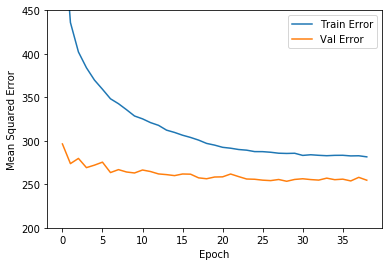

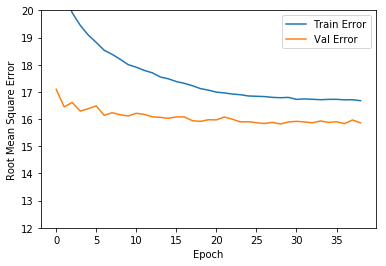

In [29]:
plot_history(history)

In [30]:
loss, mse, rmse = model.evaluate(X_test, y_test, verbose=0)

print("Testing MSE: {:5.2f}".format(mse))
print("Testing RMSE: {:5.2f}".format(rmse))

Testing MSE: 250.50
Testing RMSE: 15.68


In [31]:
y_pred = model.predict(X_test).flatten()

In [32]:
compute_RMSE(y_test, y_pred)

Root mean squared error: 15.827882399547594


# Export du dataframe sous le bon format

In [ ]:
test = pd.read_csv('./input/test.csv')


In [ ]:
ratings = pd.DataFrame(y_pred, columns=['Rating']) 

In [ ]:
export_df = pd.concat([test[['Artist', 'Track', 'User']].reset_index(drop=True), ratings.reset_index(drop=True), test[['Time']].reset_index(drop=True)], axis=1)

In [ ]:
export_df.to_csv('./output/submit.csv')